# AMPATH INTERNSHIP

## Task 1

## Predicting total knee arthroplasty (TKA) sizing

Total knee arthroplasty (TKA)/ total knee replacement is a surgical procedure to replace the weight bearing surfaces of the knee joint to releive pain and disability. It is most commonly performed for osteoarthritis and also for other knee diseases such as rheumatoid arthritis and psoriatic arthritis.

The main objective of this task is to determine whether demographic variables (height, weight and gender) can accurately predict total knee arthroplasty sizing using machine learning techniques.

Research question: Can demographic variables accurately predict component sizing in primary total knee athroplasty using machine learning techniques?

In [1]:
# Importing necessary libraries
import numpy as np # for working with arrays
import pandas as pd # for working with dataframes
import scipy as sp # statistical library
import pandas_profiling as pp # for data profiling


# Libraries for visualizations and plotting
import matplotlib.pyplot as plt
# displaying visualizations within the notebook
%matplotlib inline 
import seaborn as sns # for customized visualizations
# Filtering warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Loading the dataset

In [2]:
train_df = pd.read_csv("C:/Users/hp/Desktop/AMPATH INTERNSHIP 2021/TKA_Train_data.csv")

In [3]:
test_df = pd.read_csv("C:/Users/hp/Desktop/AMPATH INTERNSHIP 2021/TKA_Test_data.csv")

In [156]:
train_data.columns

Index(['Procedure_TKR.Height_cm', 'Procedure_TKR.Weight_kg',
       'Demographics.Gender (0=Female, 1=Male)', 'Tibia ML Dimension (mm)',
       'Femur AP Dimension (mm)'],
      dtype='object')

### Exploratory data analysis (EDA)

In [4]:
# Checking the five few rows of train data
train_df.head()

,Procedure_TKR2.F_Company,Procedure_TKR2.F_Model,Procedure_TKR2.F_Details,Femur AP Dimension (mm),Procedure_TKR2.T_Model,Procedure_TKR2.T_Details,Tibia ML Dimension (mm),Procedure_TKR2.Pat_Model,Procedure_TKR2.Pat_Details,Procedure_TKR2.Poly_Model,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,Zimmer,Persona,"Size 6, Left, Cemented, PS, Standard",60.4,Persona,"Size C, Left, 5 Degree, STM",63.8,Persona,"All poly, 35mm",Persona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zimmer,NexGen LPS Option,"Left, Size C",53.5,NexGen,"Micro/1, 40mm A/P, 58mm M/L, Precoat Stemmed",58.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zimmer,NexGen GS LPS - Flex,"Left, Size D",57.5,NexGen,"Size 3, PreCoat Stemmed",66.0,NexGen All-Poly Patella,"32mm, 8.5mm Thickness",NexGen LPS-Flex Fixed Molded Articular Surface,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Zimmer,NexGen GS LPS - Flex,"Right, Size F",65.3,NexGen,"Size 3, PreCoat Stemmed",66.0,NexGen All-Poly Patella,"32mm, 8.5mm Thickness",NexGen LPS-Flex Fixed Molded Articular Surface,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zimmer,Persona CR,"CR, Narrow, Size 7, Left",60.8,Persona,"Size D, Left, 5 Degree, NP STM",67.0,Persona,"All poly, 32mm",Persona CR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the last five rows of train data
train_df.tail()

,Procedure_TKR2.F_Company,Procedure_TKR2.F_Model,Procedure_TKR2.F_Details,Femur AP Dimension (mm),Procedure_TKR2.T_Model,Procedure_TKR2.T_Details,Tibia ML Dimension (mm),Procedure_TKR2.Pat_Model,Procedure_TKR2.Pat_Details,Procedure_TKR2.Poly_Model,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
3402,Zimmer,NexGen LPS-Flex Option,"Right, Size G",70.4,NexGen,"Size 6, PreCoat Stemmed",74.0,NaN,NaN,NexGen LPS-Flex Fixed Molded Articular Surface,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Zimmer,NexGen LPS-Flex Option,"Left, Size G",70.5,NexGen,"Size 7, PreCoat Stemmed",82.0,NaN,NaN,NexGen LPS-Flex Fixed Molded Articular Surface,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404,Zimmer,NexGen GS LPS-Flex,"Left, Size E",61.5,NexGen,"Size 3, PreCoat Stemmed",66.0,NexGen All-Poly Patella,"32mm, 8.5mm Thickness",NexGen LPS-Flex Fixed Molded Articular Surface,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3405,Stryker,Triathlon Femoral Condyle,"Cemented, Cruciate Retaining, Sz 4 Rt",62.0,Triathlon Total Knee Universal Tibial Baseplate,Size 4,70.0,Triathlon X3 Symmetric Patella,"Triathlon X3 Symmetric Patella, Cross-Linked, ...",Triathlon X3 CR Tibial Insert,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3406,Stryker,Triathlon,"Cemented, Cruciate Retaining, Sz 7 Lt",71.0,Triathlon Total Knee Universal Tibial Baseplate,Size 7,80.0,Triathlon X3 Symmetric Patella,"Triathlon X3 Symmetric Patella, Cross-Linked, ...",Triathalon X3 11 mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking the column names of train set
train_df.columns

Index(['Procedure_TKR2.F_Company', 'Procedure_TKR2.F_Model',
       'Procedure_TKR2.F_Details', 'Femur AP Dimension (mm)',
       'Procedure_TKR2.T_Model', 'Procedure_TKR2.T_Details',
       'Tibia ML Dimension (mm)', 'Procedure_TKR2.Pat_Model',
       'Procedure_TKR2.Pat_Details', 'Procedure_TKR2.Poly_Model',
       'Procedure_TKR2.Poly_Details', 'Procedure_TKR2.O1_Model',
       'Procedure_TKR2.O1_Details', 'Demographics.Gender (0=Female, 1=Male)',
       'Procedure_TKR.Height_cm', 'Procedure_TKR.Weight_kg',
       'Procedure_TKR.BMI', 'Surgery_Main.Side', 'Surgery_Main.Procedure',
       'Procedure_TKR.Primary_Diagnosis', 'Procedure_TKR.ASARisk',
       'Procedure_TKR.Approach', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 4

In [7]:
# Displaying the first five rows of test set
test_df.head()

,age,right,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.BMI,Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femoral Model,Femur implanted,Tibial Model,Tibia Implanted,Unnamed: 10
0,59,1,0.0,30.13,95.3,177.8,SN Legion Size 6,66.0,Genesis II size 5,74.0,NaN
1,42,0,1.0,32.49,100.2,173.2,SN Legion Size 7,70.0,Genesis II size 6,77.0,NaN
2,71,0,0.0,34.00,98.4,170.2,Stryker Triathlon Femoral 5,65.0,Stryker Triathlon Tibial 5,74.0,NaN
3,83,0,0.0,24.27,62.1,160.0,SN Legion Size 4,59.0,Genesis II size 2,64.0,NaN
4,56,1,1.0,49.51,161.0,180.3,Stryker Triathlon Femoral 8,75.0,Stryker Triathlon Tibial 7,80.0,NaN


In [8]:
# Checking the length of test set
len(test_df)

1016

In [9]:
# Summary statistics
train_df.describe()

,Femur AP Dimension (mm),Tibia ML Dimension (mm),"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,Procedure_TKR.BMI,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
count,3389.000000,3384.000000,3400.000000,3393.000000,3399.000000,3385.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,64.445117,72.255496,0.372647,168.853248,96.577129,35.346689,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,56.865458,57.014339,0.483580,56.762893,61.697155,29.581954,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,52.300000,43.000000,0.000000,0.000000,0.000000,12.771436,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,59.600000,66.000000,0.000000,160.020000,78.000000,27.896468,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,63.500000,71.000000,0.000000,167.640000,92.300000,32.227499,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,66.200000,75.100000,1.000000,175.260000,109.090000,37.966465,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3363.000000,3371.000000,1.000000,3377.000000,3377.000000,622.558594,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Counting the number of columns
len(train_df.columns)

77

In [11]:
# Summary statistics for test set
test_df.describe()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.BMI,Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femur implanted,Tibia Implanted,Unnamed: 10
count,496.000000,490.000000,491.000000,491.000000,491.000000,488.000000,0.0
mean,0.389113,33.332373,95.979063,169.359898,64.157434,71.393033,NaN
std,0.488041,6.857739,23.122266,11.086556,5.047097,5.876109,NaN
min,0.000000,18.959000,44.900000,139.700000,51.900000,58.000000,NaN
25%,0.000000,28.638000,80.300000,160.000000,59.600000,66.000000,NaN
50%,0.000000,32.289500,93.400000,167.710000,63.000000,71.000000,NaN
75%,1.000000,37.459250,108.700000,177.800000,67.350000,75.000000,NaN
max,1.000000,62.980000,195.000000,195.600000,77.500000,87.000000,NaN


In [12]:
# Checking column names for test set
test_df.columns

Index(['age', 'right', 'Demographics.Gender (0=Female, 1=Male)',
       'Procedure_TKR.BMI', 'Procedure_TKR.Weight_kg',
       'Procedure_TKR.Height_cm', 'Femoral Model', 'Femur implanted',
       'Tibial Model', 'Tibia Implanted', 'Unnamed: 10'],
      dtype='object')

In [13]:
# Number of columns of test set
len(test_df.columns)

11

In [14]:
# Checking the datatypes
test_df.dtypes

age                                        object
right                                      object
Demographics.Gender (0=Female, 1=Male)    float64
Procedure_TKR.BMI                         float64
Procedure_TKR.Weight_kg                   float64
Procedure_TKR.Height_cm                   float64
Femoral Model                              object
Femur implanted                           float64
Tibial Model                               object
Tibia Implanted                           float64
Unnamed: 10                               float64
dtype: object

In [15]:
# Checking variable age in test data
test_df['age']

0        59
1        42
2        71
3        83
4        56
       ... 
1011    NaN
1012    NaN
1013    NaN
1014    NaN
1015    NaN
Name: age, Length: 1016, dtype: object

In [16]:
# Data types for train set
train_df.dtypes

Procedure_TKR2.F_Company     object
Procedure_TKR2.F_Model       object
Procedure_TKR2.F_Details     object
Femur AP Dimension (mm)     float64
Procedure_TKR2.T_Model       object
                             ...   
Unnamed: 72                 float64
Unnamed: 73                 float64
Unnamed: 74                 float64
Unnamed: 75                 float64
Unnamed: 76                 float64
Length: 77, dtype: object

In [17]:
# Checking missing values
train_df.isna().sum()

Procedure_TKR2.F_Company       5
Procedure_TKR2.F_Model         9
Procedure_TKR2.F_Details      11
Femur AP Dimension (mm)       18
Procedure_TKR2.T_Model        11
                            ... 
Unnamed: 72                 3407
Unnamed: 73                 3407
Unnamed: 74                 3407
Unnamed: 75                 3407
Unnamed: 76                 3407
Length: 77, dtype: int64

In [18]:
# checking the value counts of each data type 
display(train_df.dtypes.value_counts())

float64    60
object     17
dtype: int64

In [19]:
display(test_df.dtypes.value_counts())

float64    7
object     4
dtype: int64

In [20]:
# Checking missing values for each variable that will be used
train_df['Procedure_TKR.Height_cm'].isna().sum()

14

In [21]:
train_df['Procedure_TKR.Weight_kg'].isna().sum()

8

In [22]:
train_df['Demographics.Gender (0=Female, 1=Male)'].isna().sum()

7

In [23]:
train_df['Tibia ML Dimension (mm)'].isna().sum()

23

In [24]:
train_df['Femur AP Dimension (mm)'].isna().sum()

18

In [25]:
train_df['Demographics.Gender (0=Female, 1=Male)'].dtype

dtype('float64')

In [26]:
# Checking the levels in the categorical variable gender.
print (train_df['Demographics.Gender (0=Female, 1=Male)'].unique())

[ 0. nan  1.]


In [27]:
# Slicing the data to remain with desired variables
train_data=train_df.loc[:,['Procedure_TKR.Height_cm','Procedure_TKR.Weight_kg','Demographics.Gender (0=Female, 1=Male)','Tibia ML Dimension (mm)',
                          'Femur AP Dimension (mm)']]

In [28]:
# Dropping null values on variable gender
train_data = train_data.dropna(subset=['Demographics.Gender (0=Female, 1=Male)'])

In [29]:
train_data.head()

,Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,"Demographics.Gender (0=Female, 1=Male)",Tibia ML Dimension (mm),Femur AP Dimension (mm)
0,60.00,58.64,0.0,63.8,60.4
1,116.84,62.20,0.0,58.0,53.5
2,127.00,52.00,0.0,66.0,57.5
3,124.46,68.64,0.0,66.0,65.3
4,121.92,75.00,0.0,67.0,60.8


In [30]:
# train_data=train_data.astype({'Demographics.Gender (0=Female, 1=Male)': 'int32'})

In [31]:
# Checking the length of train set after deopping null values in train set
len(train_data)

3400

In [32]:
train_data.dtypes

Procedure_TKR.Height_cm                   float64
Procedure_TKR.Weight_kg                   float64
Demographics.Gender (0=Female, 1=Male)    float64
Tibia ML Dimension (mm)                   float64
Femur AP Dimension (mm)                   float64
dtype: object

In [33]:
train_data.isna().sum()

Procedure_TKR.Height_cm                    9
Procedure_TKR.Weight_kg                    3
Demographics.Gender (0=Female, 1=Male)     0
Tibia ML Dimension (mm)                   19
Femur AP Dimension (mm)                   14
dtype: int64

In [34]:
# Imputing missing values
# K-NN IMPUTATION
#  KNN Imputer maintains the value and variability of your datasets and yet it is more precise and efficient than using the average values.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train_data = pd.DataFrame(imputer.fit_transform(train_data),columns = train_data.columns)

In [35]:
train_data.isna().sum()

Procedure_TKR.Height_cm                   0
Procedure_TKR.Weight_kg                   0
Demographics.Gender (0=Female, 1=Male)    0
Tibia ML Dimension (mm)                   0
Femur AP Dimension (mm)                   0
dtype: int64

##### Comment
We see that now our train set has no missing values

In [36]:
# Converting the variable gender from float to integer
train_data=train_data.astype({'Demographics.Gender (0=Female, 1=Male)': 'int32'})

In [37]:
train_data.dtypes

Procedure_TKR.Height_cm                   float64
Procedure_TKR.Weight_kg                   float64
Demographics.Gender (0=Female, 1=Male)      int32
Tibia ML Dimension (mm)                   float64
Femur AP Dimension (mm)                   float64
dtype: object

In [38]:
# Checking the unique levels in gender
print (train_data['Demographics.Gender (0=Female, 1=Male)'].unique())

[0 1]


In [39]:
train_data['Demographics.Gender (0=Female, 1=Male)'].isna().sum()

0

## Visualizations

### 1. Visualizing distribution of categorical variable gender

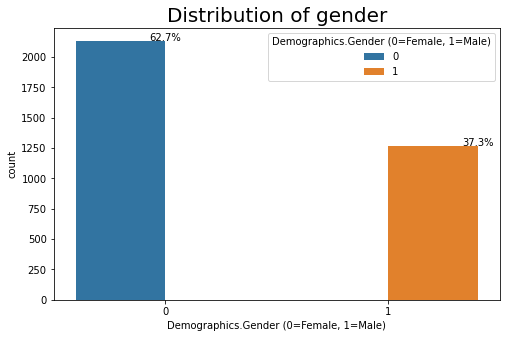

In [40]:
# sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_data))
ax = sns.countplot(x="Demographics.Gender (0=Female, 1=Male)", hue="Demographics.Gender (0=Female, 1=Male)", data=train_data)
plt.title('Distribution of gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### Interpretation
The above barchart shows the distribution of gender in the training data set.
It is evident that females are more than males i.e 62.7% are females whereas 37.3% are males.


### 2. Multiple Histograms to check the distribution of continous variables

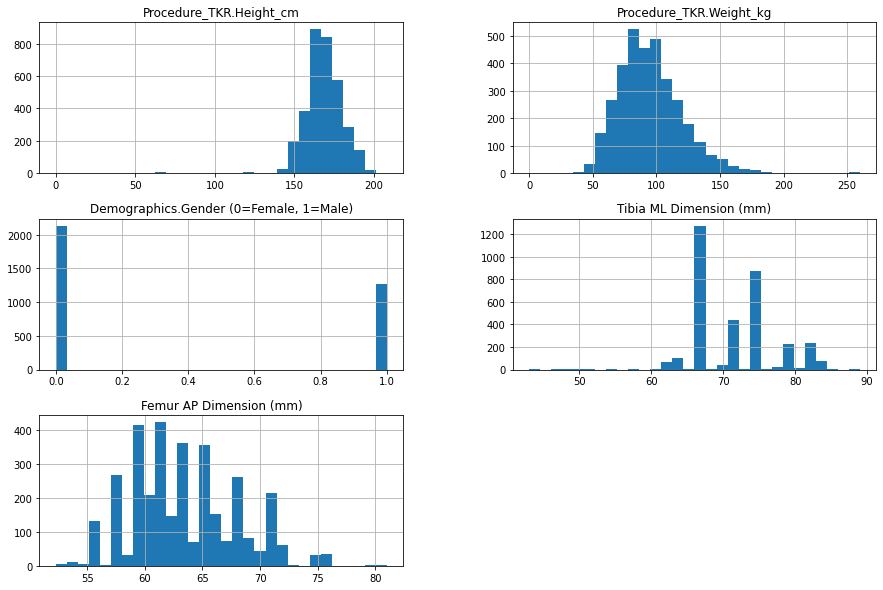

In [41]:
# Multiple histograms
train_data.hist(bins=30, figsize=(15,10));

##### Interpretation
The above multiple histograms show the distributions of the variables.

Focusing on the continous variables, height, weight and femur dimension appear to be normally distributed. However, tibia dimension appears to be skewed to the left.

### 3. Boxplots to check the distribution of outcome variables(femur and tibia dimension) distribution between males and females

#### 3.1 Gender vs tibia dimension

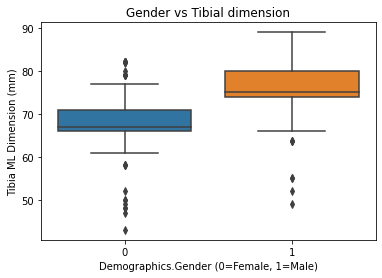

In [42]:
# BOXPLOTS
sns.boxplot(x='Demographics.Gender (0=Female, 1=Male)', y='Tibia ML Dimension (mm)', data=train_data)
plt.title('Gender vs Tibial dimension');

##### Interpretation
The above boxplots compares the distribution of tibial length among gender.

It can be seen that the boxplot for males is abit higher. 

The median tibial length for males is approximately 75mm,the minimum is about 66mm while the maximum is almost 90mm. 
For females, the median tibial length is about 67mm, the minimum is 62mm while the maximum is about 76mm. The interquartile ranges for the 2 genders are not very different from each other.

Moreover, for both genders, we observe that there are some outliers in the tibial dimension.

Generally, the tibial dimension for males is higher than that of females.

#### 3.2 T-test to check whether the difference between tibia dimension for females and males is statistically significant

In [43]:
# mean_tibia_females = np.mean('Tibia ML Dimension (mm)', data = train_data)
mean_tibia = train_data.groupby('Demographics.Gender (0=Female, 1=Male)', as_index=False)['Tibia ML Dimension (mm)'].mean()
print(mean_tibia)

   Demographics.Gender (0=Female, 1=Male)  Tibia ML Dimension (mm)
0                                       0                68.120816
1                                       1                76.630845


In [44]:
# Extracting the male data from train_data
male_data = train_data[train_data['Demographics.Gender (0=Female, 1=Male)']== 1]
male_data.head()

,Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,"Demographics.Gender (0=Female, 1=Male)",Tibia ML Dimension (mm),Femur AP Dimension (mm)
1377,152.40,53.80,1,67.0,57.3
1384,152.40,59.09,1,63.8,60.8
1388,152.40,60.30,1,74.0,59.4
1393,157.48,55.00,1,63.8,60.8
1395,154.94,59.09,1,66.0,61.5


In [45]:
# Checking the length
len(male_data)

1267

In [46]:
# Extracting the female data from train data
female_data = train_data[train_data['Demographics.Gender (0=Female, 1=Male)']== 0]
female_data.head()

,Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,"Demographics.Gender (0=Female, 1=Male)",Tibia ML Dimension (mm),Femur AP Dimension (mm)
0,60.00,58.64,0,63.8,60.4
1,116.84,62.20,0,58.0,53.5
2,127.00,52.00,0,66.0,57.5
3,124.46,68.64,0,66.0,65.3
4,121.92,75.00,0,67.0,60.8


In [47]:
# Checking the length
len(female_data)

2133

In [48]:
# Extracting the tibia dimension for males
male_tibia = male_data['Tibia ML Dimension (mm)']
male_tibia.head()

1377    67.0
1384    63.8
1388    74.0
1393    63.8
1395    66.0
Name: Tibia ML Dimension (mm), dtype: float64

In [49]:
# Extracting the tibia dimensions for females
female_tibia = female_data['Tibia ML Dimension (mm)']
female_tibia.head()

0    63.8
1    58.0
2    66.0
3    66.0
4    67.0
Name: Tibia ML Dimension (mm), dtype: float64

In [50]:
# T-test using p-values
from scipy.stats import ttest_ind
male_tibia_mean = np.mean(male_tibia)
female_tibia_mean = np.mean(female_tibia)
print("male_tibia mean value:",male_tibia_mean)
print("female_tibia mean value:",female_tibia_mean)
male_tibia_std = np.std(male_tibia)
female_tibia_std = np.std(female_tibia)
print("male_tibia std value:",female_tibia_std)
print("female_tibia std value:",female_tibia_std)
ttest,pval = ttest_ind(male_tibia,female_tibia)
print("p-value",pval)
if pval <0.05:
  print("we reject the null hypothesis")
else:
  print("we do not reject the null hypothesis")

male_tibia mean value: 76.6308445146014
female_tibia mean value: 68.12081575246148
male_tibia std value: 3.7311634102633944
female_tibia std value: 3.7311634102633944
p-value 0.0
we reject the null hypothesis


#### Interpretation of t-test
H0: There is no statistical significant difference in tibial dimension between males and females


H1: There is a statistical significant difference in tibial dimension between males and females


The p-value for the two-sample t-test is 0.0 which is less than the 95% confidence interval threshold of 0.05. Therefore we reject the null hypothesis and conclude that there is a  statistical significant difference in tibial dimension between males and females.

#### 3.3 Gender vs Femur dimension

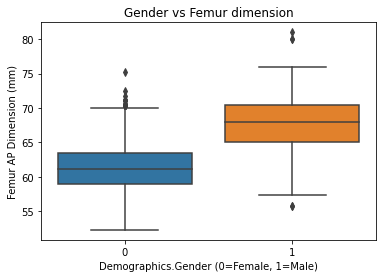

In [51]:
sns.boxplot(x='Demographics.Gender (0=Female, 1=Male)', y='Femur AP Dimension (mm)', data=train_data)
plt.title('Gender vs Femur dimension');

##### Interpretation
The above boxplots compares the distribution of Femur AP dimension among gender.
It can be seen that the boxplot for males is abit higher. The median femur dimension for males is approximately 68mm,the minimum is about 57mm while the maximum is about 76mm. 
For females, the median femur dimension is about 62mm, the minimum is 52mm while the maximum is about 70mm. The interquartile ranges for the 2 genders are not very different from each other.
Moreover, for both genders, we observe that there are some outliers in the femur dimension.
Generally, the femur AP dimension for males is higher than that of females.
In addition, the femur AP dimension for both genders is lower than the tibia ML dimension.

#### 3.4 T-test to check whether the difference between femur dimension for females and males is statistically significant

In [52]:
# Extracting femur dimension for females
female_femur = female_data['Femur AP Dimension (mm)']
female_femur.head()

0    60.4
1    53.5
2    57.5
3    65.3
4    60.8
Name: Femur AP Dimension (mm), dtype: float64

In [53]:
# Extracting femur dimension for males
male_femur = male_data['Femur AP Dimension (mm)']
male_femur.head()

1377    57.3
1384    60.8
1388    59.4
1393    60.8
1395    61.5
Name: Femur AP Dimension (mm), dtype: float64

In [54]:
# Performing the tw0-sample t-test
from scipy.stats import ttest_ind
male_femur_mean = np.mean(male_femur)
female_femur_mean = np.mean(female_femur)
print("male_femur mean value:",male_femur_mean)
print("female_femur mean value:",female_femur_mean)
male_femur_std = np.std(male_femur)
female_femur_std = np.std(female_femur)
print("male_femur std value:",female_femur_std)
print("female_femur std value:",female_femur_std)
ttest,pval = ttest_ind(male_femur,female_femur)
print("p-value",pval)
if pval <0.05:
  print("we reject the null hypothesis")
else:
  print("we do not reject the null hypothesis")

male_femur mean value: 67.35341752170469
female_femur mean value: 61.17277074542858
male_femur std value: 3.3009194278770972
female_femur std value: 3.3009194278770972
p-value 0.0
we reject the null hypothesis


##### Interpretation of t-test 
H0: There is no statistical significant difference in femur dimension between males and females


H1: There is a statistical significant difference in femur dimension between males and females


The p-value for the two-sample t-test is 0.0 which is less than the 95% confidence interval threshold of 0.05. Therefore we reject the null hypothesis and conclude that there is a  statistical significant difference in femur dimension between males and females.

In [55]:
train_data.columns

Index(['Procedure_TKR.Height_cm', 'Procedure_TKR.Weight_kg',
       'Demographics.Gender (0=Female, 1=Male)', 'Tibia ML Dimension (mm)',
       'Femur AP Dimension (mm)'],
      dtype='object')

### 4. Scatter plots to check whether there is a linear relationship btn variables and also check outliers

<AxesSubplot:xlabel='Tibia ML Dimension (mm)', ylabel='Femur AP Dimension (mm)'>

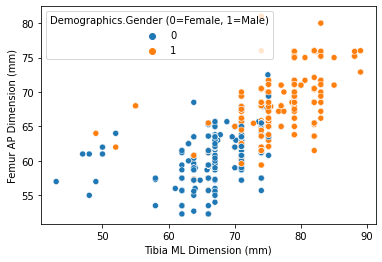

In [56]:
# Scatter plot with colored labels
sns.scatterplot(x='Tibia ML Dimension (mm)', y='Femur AP Dimension (mm)', hue='Demographics.Gender (0=Female, 1=Male)', data=train_data)

##### Interpretation
The above scatterplot shows that there appears to be a positive linear relationship between femur and tibia dimension for males and females. 

As tibia dimension increases, the femur dimension also increases. 

### 5. Line plot to check the trend of the outcome variables

<AxesSubplot:>

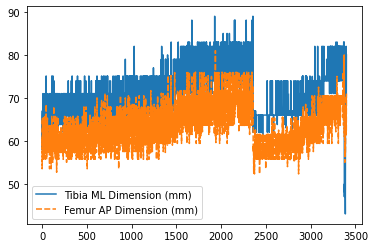

In [57]:
# Lineplot
sns.lineplot(data=train_data.drop(['Demographics.Gender (0=Female, 1=Male)','Procedure_TKR.Height_cm','Procedure_TKR.Weight_kg'], axis=1))

##### Interpretation
The lineplot above shows that both the tibia and femur dimension show an increasing trend and then reduce but further starts to increase.

However, the tibial dimension appears to be higher than the femur dimension.

### 6. Density plots

<AxesSubplot:xlabel='Tibia ML Dimension (mm)', ylabel='Density'>

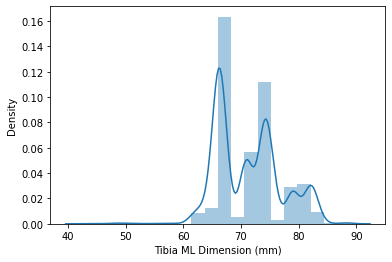

In [58]:
# Density plot for tibia dimension
sns.distplot(train_data['Tibia ML Dimension (mm)'], bins=20, kde=True)

##### Interpretation
The above is a density plot which is a smoother version of the histogram. Tibia dimension appears to be skewed to the left 

<AxesSubplot:xlabel='Femur AP Dimension (mm)', ylabel='Density'>

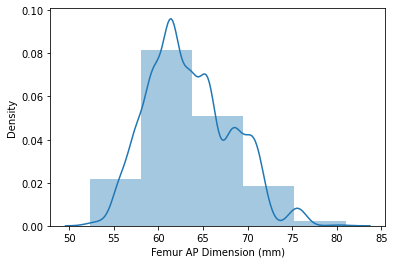

In [59]:
# Density plot for femur dimension
sns.distplot(train_data['Femur AP Dimension (mm)'], bins=5, kde=True) 

##### Interpretation
The density plot for femur shows that femur dimension is normally distributed due to the bell shape.  

### 7. Heat map to view correlations

<AxesSubplot:>

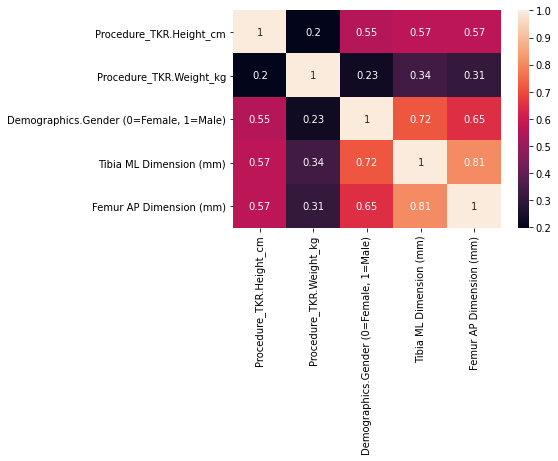

In [60]:
# Heatmap to view correlations
sns.heatmap(train_data.corr(), annot=True)

#### Interpretation
The above plot is a heatmap which shows the correlation between the variables.

Focusing on the independent variables, it is observed that all the variables are positively correlated, however they are not highly correlated since the correlation values are all 0.55 and below.
Therefore, performing variable selection is not appropriate and all the three independent variables will be used for modelling.

Moreover, looking at the correlation between dependent and independent variables, variable gender has the highest positive correlation of 0.65 and 0.72 for the dependent variables femur dimension and tibia dimension respectively. Therefore, gender seems to contribute the most to the femur and tibia dimensions.

### 8. Facet grid to view the distribution of femur and tibia between the genders

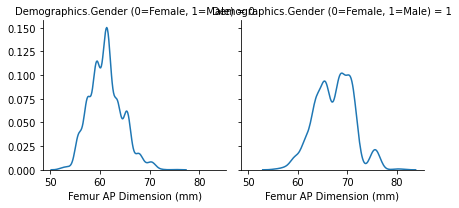

In [61]:
# Facet grid
g = sns.FacetGrid(train_data, col='Demographics.Gender (0=Female, 1=Male)')
g = g.map(sns.kdeplot, 'Femur AP Dimension (mm)')

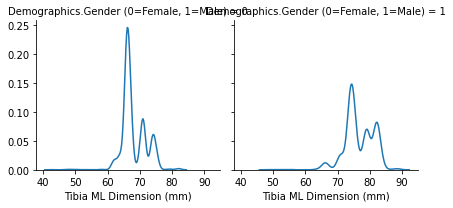

In [62]:
g = sns.FacetGrid(train_data, col='Demographics.Gender (0=Female, 1=Male)')
g = g.map(sns.kdeplot, 'Tibia ML Dimension (mm)')

##### Interpretation
The above facet grids show the distributions of femur and tibia dimension for both genders. 

Femur dimension appears to have a better bell shape than tibia dimension

In [63]:
# Pair plot
# sns.pairplot(train_data)

In [64]:
# # create figure and axis
# fig, ax = plt.subplots()
# # plot histogram
# ax.hist(train_data['Procedure_TKR.Height_cm'])
# # set title and labels
# ax.set_title('histogram height')
# ax.set_xlabel('Procedure_TKR.Height_cm')
# ax.set_ylabel('Frequency')

## Dealing with outliers

### Drawing scatterplots to check outliers

<AxesSubplot:xlabel='Tibia ML Dimension (mm)', ylabel='Femur AP Dimension (mm)'>

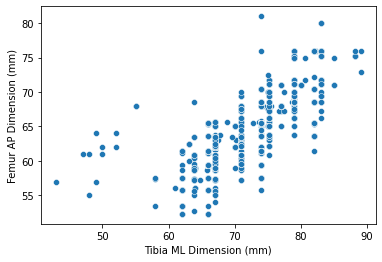

In [65]:
sns.scatterplot(x='Tibia ML Dimension (mm)', y='Femur AP Dimension (mm)',data=train_data)

##### Interpretation
It is clear that there are outliers in variables femur and tibia


<AxesSubplot:xlabel='Procedure_TKR.Height_cm', ylabel='Procedure_TKR.Weight_kg'>

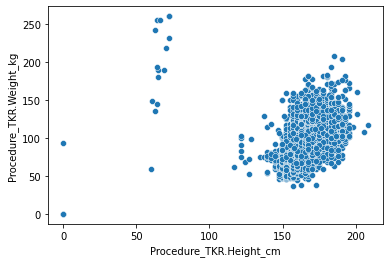

In [66]:
sns.scatterplot(x='Procedure_TKR.Height_cm', y='Procedure_TKR.Weight_kg',data=train_data)

#### Interpretation
From the scatterplot, it is clear that there are some outliers for the variable weight and height

#### Using z-score to check and remove outliers
The z values outside the range (-3,3) are taken as outliers

In [67]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_data))
print(z)

[[ 7.89779234  1.46306216  0.77071335  1.30222388  0.66732749]
 [ 3.73802163  1.32213648  0.77071335  2.31034524  2.16427279]
 [ 2.99447359  1.7259123   0.77071335  0.91983303  1.29647841]
 ...
 [12.28882405  0.06330599  0.77071335  0.91983303  0.42868404]
 [12.28882405  3.78437725  0.77071335  0.22457692  0.32020974]
 [12.28882405  3.78437725  1.29749926  1.51356334  1.6323276 ]]


In [68]:
# Defining a threshold to identify outliers
threshold = 3
print(np.where(z>3))

(array([   0,    1,    3,    4,   32, 1429, 1928, 1936, 2348, 2350, 2351,
       2352, 2353, 2355, 2356, 2357, 2382, 2385, 2386, 2389, 2390, 2390,
       2396, 2396, 2397, 2399, 2399, 2410, 2410, 2601, 2601, 2675, 2675,
       2900, 2970, 2970, 3027, 3027, 3096, 3111, 3111, 3239, 3239, 3256,
       3257, 3266, 3267, 3298, 3302, 3324, 3324, 3369, 3372, 3373, 3374,
       3376, 3377, 3378, 3379, 3380, 3381, 3382, 3385, 3386, 3387, 3397,
       3398, 3398, 3399, 3399], dtype=int64), array([0, 0, 0, 0, 0, 1, 3, 4, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 1, 0, 1], dtype=int64))


In [69]:
# Removing the outliers outside the range of 3
train_data = train_data[(z < 3).all(axis=1)]


In [70]:
# Checking the length of train set after removing outliers
len(train_data)

3343

### Checking and removing duplicates

In [71]:
train_data.duplicated().sum()

119

In [72]:
train_data.drop_duplicates(inplace=True)

In [73]:
len(train_data)

3224

#####  Scaling / standardizing the data

In [74]:
# # Scaling the numeric variables
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
# train_data = pd.DataFrame(scaler.fit_transform(train_data), columns = train_data.columns)
# train_data.head()

In [75]:
# train_data=train_data.astype({'Demographics.Gender (0=Female, 1=Male)': 'int32'})

### Defining the x and y variables

In [76]:
x_femur = train_data.loc[:,['Procedure_TKR.Height_cm','Procedure_TKR.Weight_kg','Demographics.Gender (0=Female, 1=Male)']]
x_femur.tail()

,Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,"Demographics.Gender (0=Female, 1=Male)"
3392,172.720,86.36,1
3393,176.276,113.64,0
3394,172.212,111.30,0
3395,182.880,99.55,1
3396,186.436,102.27,1


In [77]:
y_femur = train_data.loc[:,['Femur AP Dimension (mm)']]
y_femur.head()

,Femur AP Dimension (mm)
2,57.5
5,59.0
6,58.7
7,59.0
8,58.7


### Performing cross - validation

In [78]:
# Importing important libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor

In [79]:
# Preparing the cross-validation procedure
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
model1=LinearRegression()
scores = cross_val_score(model1, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.551 (0.015)


In [80]:
# Preparing the cross-validation procedure
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
model2=RandomForestRegressor(max_depth=5, random_state=0)
scores = cross_val_score(model2, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.550 (0.016)


In [81]:
# Preparing the cross-validation procedure
from sklearn import svm
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
model3 = svm.SVR()
scores = cross_val_score(model3, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.510 (0.010)


In [82]:
# Preparing the cross-validation procedure
from sklearn import svm
from sklearn.svm import SVR
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
# model4 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model4 = SVR(kernel='rbf')
scores = cross_val_score(model4, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))


r2: 0.510 (0.010)


In [83]:
from sklearn import svm
from sklearn.svm import SVR
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
# model4 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model4 = SVR(kernel='linear')
scores = cross_val_score(model4, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.550 (0.015)


In [84]:
from sklearn import svm
from sklearn.svm import SVR
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
# model4 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model4 = SVR(kernel='poly')
scores = cross_val_score(model4, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.520 (0.010)


In [85]:
from xgboost import XGBRegressor
# param = {"booster":"gblinear", "objective":"reg:linear"}
model5 = XGBRegressor(objective='reg:squarederror',  n_estimators = 10, seed = 123) 
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_val_score(model5, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.387 (0.036)


In [86]:
from sklearn.ensemble import GradientBoostingRegressor
model6 = GradientBoostingRegressor() 
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_val_score(model6, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.545 (0.016)


In [87]:
import lightgbm
from lightgbm import LGBMRegressor
model7 = LGBMRegressor() 
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_val_score(model7, x_femur, y_femur,scoring = 'r2', cv=cv_femur, n_jobs = -1)
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: nan (nan)


In [88]:
from sklearn.model_selection import RepeatedKFold
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_femur, y_femur, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -2.437 (0.092)


In [89]:
from sklearn.model_selection import RepeatedKFold
model8 = SVR(kernel='linear')
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model8, x_femur, y_femur, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -2.430 (0.092)


In [90]:
model9=RandomForestRegressor(max_depth=5, random_state=0)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model9, x_femur, y_femur, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -2.415 (0.100)


In [91]:
from sklearn.model_selection import RepeatedKFold
model8 = SVR(kernel='rbf')
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model8, x_femur, y_femur, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -2.521 (0.079)


#### Checking test data

In [92]:
test_df.columns

Index(['age', 'right', 'Demographics.Gender (0=Female, 1=Male)',
       'Procedure_TKR.BMI', 'Procedure_TKR.Weight_kg',
       'Procedure_TKR.Height_cm', 'Femoral Model', 'Femur implanted',
       'Tibial Model', 'Tibia Implanted', 'Unnamed: 10'],
      dtype='object')

In [93]:
test_df.head()

,age,right,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.BMI,Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femoral Model,Femur implanted,Tibial Model,Tibia Implanted,Unnamed: 10
0,59,1,0.0,30.13,95.3,177.8,SN Legion Size 6,66.0,Genesis II size 5,74.0,NaN
1,42,0,1.0,32.49,100.2,173.2,SN Legion Size 7,70.0,Genesis II size 6,77.0,NaN
2,71,0,0.0,34.00,98.4,170.2,Stryker Triathlon Femoral 5,65.0,Stryker Triathlon Tibial 5,74.0,NaN
3,83,0,0.0,24.27,62.1,160.0,SN Legion Size 4,59.0,Genesis II size 2,64.0,NaN
4,56,1,1.0,49.51,161.0,180.3,Stryker Triathlon Femoral 8,75.0,Stryker Triathlon Tibial 7,80.0,NaN


In [94]:
test_data =test_df.loc[:,['Demographics.Gender (0=Female, 1=Male)','Procedure_TKR.Weight_kg','Procedure_TKR.Height_cm','Femur implanted','Tibia Implanted' ]]


In [95]:
test_data.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femur implanted,Tibia Implanted
0,0.0,95.3,177.8,66.0,74.0
1,1.0,100.2,173.2,70.0,77.0
2,0.0,98.4,170.2,65.0,74.0
3,0.0,62.1,160.0,59.0,64.0
4,1.0,161.0,180.3,75.0,80.0


In [96]:
train_data.head()

,Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,"Demographics.Gender (0=Female, 1=Male)",Tibia ML Dimension (mm),Femur AP Dimension (mm)
2,127.00,52.00,0,66.0,57.5
5,127.00,72.73,0,63.8,59.0
6,139.70,54.09,0,67.0,58.7
7,147.32,46.70,0,67.0,59.0
8,149.86,47.27,0,67.0,58.7


In [97]:
test_data = test_data.rename(columns={'Femur implanted':'Femur AP Dimension (mm)'})

In [98]:
test_data.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femur AP Dimension (mm),Tibia Implanted
0,0.0,95.3,177.8,66.0,74.0
1,1.0,100.2,173.2,70.0,77.0
2,0.0,98.4,170.2,65.0,74.0
3,0.0,62.1,160.0,59.0,64.0
4,1.0,161.0,180.3,75.0,80.0


In [154]:
len(test_data)

496

In [99]:
test_data.isna().sum()

Demographics.Gender (0=Female, 1=Male)    520
Procedure_TKR.Weight_kg                   525
Procedure_TKR.Height_cm                   525
Femur AP Dimension (mm)                   525
Tibia Implanted                           528
dtype: int64

In [100]:
test_data = test_data.dropna(subset=['Demographics.Gender (0=Female, 1=Male)'])

In [101]:
test_data.isna().sum()

Demographics.Gender (0=Female, 1=Male)    0
Procedure_TKR.Weight_kg                   5
Procedure_TKR.Height_cm                   5
Femur AP Dimension (mm)                   5
Tibia Implanted                           8
dtype: int64

In [102]:
# Imputing missing values
# K-NN IMPUTATION
#  KNN Imputer maintains the value and variability of your datasets and yet it is more precise and efficient than using the average values.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
test_data = pd.DataFrame(imputer.fit_transform(test_data),columns = test_data.columns)

In [103]:
test_data.isna().sum()

Demographics.Gender (0=Female, 1=Male)    0
Procedure_TKR.Weight_kg                   0
Procedure_TKR.Height_cm                   0
Femur AP Dimension (mm)                   0
Tibia Implanted                           0
dtype: int64

In [104]:
len(test_data)

496

In [105]:
# Converting the variable gender from float to integer
test_data=test_data.astype({'Demographics.Gender (0=Female, 1=Male)': 'int32'})

In [106]:
test_data.dtypes

Demographics.Gender (0=Female, 1=Male)      int32
Procedure_TKR.Weight_kg                   float64
Procedure_TKR.Height_cm                   float64
Femur AP Dimension (mm)                   float64
Tibia Implanted                           float64
dtype: object

In [107]:
test_data.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femur AP Dimension (mm),Tibia Implanted
0,0,95.3,177.8,66.0,74.0
1,1,100.2,173.2,70.0,77.0
2,0,98.4,170.2,65.0,74.0
3,0,62.1,160.0,59.0,64.0
4,1,161.0,180.3,75.0,80.0


In [108]:
# # Scaling the numeric variables
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
# test_data = pd.DataFrame(scaler.fit_transform(test_data), columns = test_data.columns)
# test_data.tail()

In [109]:
x_test=test_data.loc[:,['Demographics.Gender (0=Female, 1=Male)','Procedure_TKR.Weight_kg','Procedure_TKR.Height_cm']]

In [110]:

y_test=test_data.loc[:,['Femur AP Dimension (mm)']]

In [111]:
y_test.head()

,Femur AP Dimension (mm)
0,66.0
1,70.0
2,65.0
3,59.0
4,75.0


In [112]:
x_test.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm
0,0,95.3,177.8
1,1,100.2,173.2
2,0,98.4,170.2
3,0,62.1,160.0
4,1,161.0,180.3


In [113]:
x_test.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm
0,0,95.3,177.8
1,1,100.2,173.2
2,0,98.4,170.2
3,0,62.1,160.0
4,1,161.0,180.3


In [114]:
y_test.head()

,Femur AP Dimension (mm)
0,66.0
1,70.0
2,65.0
3,59.0
4,75.0


In [115]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_femur, y_femur)
y_pred = lr.predict(x_test)
r_square = r2_score(y_test,y_pred)
print(r_square)

-7379.962096148338


In [116]:
from sklearn.metrics import r2_score
from sklearn import svm
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
svm = svm.SVR(kernel = 'linear')
svm.fit(x_femur, y_femur)
y_pred = svm.predict(x_test)
r_square = r2_score(y_test,y_pred)
print(r_square)

-6957.38734922254


In [117]:
from sklearn.metrics import r2_score
from sklearn import svm
cv_femur = KFold(n_splits=5, random_state=10, shuffle=True)
svm = svm.SVR(kernel = 'rbf')
svm.fit(x_femur, y_femur)
y_pred = svm.predict(x_test)
r_square = r2_score(y_test,y_pred)
print(r_square)

0.023633668628289972


In [118]:
# from xgboost import XGBRegressor
# # param = {"booster":"gblinear", "objective":"reg:linear"}
# xgb = XGBRegressor() 
# xgb.fit(x_femur, y_femur)
# y_pred = xgb.predict(x_test)
# r_square = r2_score(y_test,y_pred)
# print(r_square)


In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor() 
gb.fit(x_femur, y_femur)
y_pred = gb.predict(x_test)
r_square = r2_score(y_test,y_pred)
print(r_square)

-0.11462237514930718


In [120]:

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_femur, y_femur)
y_pred = rf.predict(x_test)
r_square = r2_score(y_test,y_pred)
print(r_square)

0.0027268068079450147


In [121]:
from sklearn.metrics import mean_squared_error
training_mse = mean_squared_error(y_femur, rf.predict(x_femur))
test_mse = mean_squared_error(y_test, rf.predict(x_test))
print('MSE on training data is: {}'.format(training_mse))
print('MSE on test data is: {}'.format(test_mse))

MSE on training data is: 2.8405252468132782
MSE on test data is: 25.121645720225942


In [122]:
from sklearn.metrics import r2_score
rd = Ridge()
rd.fit(x_femur, y_femur)
y_pred = rd.predict(x_test)
r_square = r2_score(y_test,y_pred)
print(r_square)

-7338.000380439374


In [123]:
import numpy
from sklearn import linear_model
cls = RandomForestRegressor(n_estimators=250, criterion='mse', max_depth=30)#cls = RandomForestRegressor(n_estimators=150)

cls.fit(x_femur, y_femur)#We are training the model with RBF'ed data

scoreOfModel = cls.score(x_femur, y_femur)


print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.8650824366625309


### Modelling 

In [124]:
import numpy as np
import pandas as pd 
# from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
# import folium
# from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})



In [125]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [126]:
test_data.columns

Index(['Demographics.Gender (0=Female, 1=Male)', 'Procedure_TKR.Weight_kg',
       'Procedure_TKR.Height_cm', 'Femur AP Dimension (mm)',
       'Tibia Implanted'],
      dtype='object')

In [127]:
train_data.columns

Index(['Procedure_TKR.Height_cm', 'Procedure_TKR.Weight_kg',
       'Demographics.Gender (0=Female, 1=Male)', 'Tibia ML Dimension (mm)',
       'Femur AP Dimension (mm)'],
      dtype='object')

In [128]:
# lr = linear_model.LinearRegression()
# X_train = np.array(train_data['Demographics.Gender (0=Female, 1=Male)'], dtype=pd.Series).reshape(-1,1)
# y_train = np.array(train_data['Femur AP Dimension (mm)'], dtype=pd.Series)
# lr.fit(X_train,y_train)

# X_test = np.array(test_data['Demographics.Gender (0=Female, 1=Male)'], dtype=pd.Series).reshape(-1,1)
# y_test = np.array(test_data['Femur implanted'], dtype=pd.Series)

# pred = lr.predict(X_test)
# rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
# rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
# rtesm = float(format(lr.score(X_test, y_test),'.3f'))
# cv = float(format(cross_val_score(lr,train_data[['Demographics.Gender (0=Female, 1=Male)']],train_data['Femur AP Dimension (mm)'],cv=5).mean(),'.3f'))

# print ("Average femur dimension for Test Data: {:.3f}".format(y_test.mean()))
# print('Intercept: {}'.format(lr.intercept_))
# print('Coefficient: {}'.format(lr.coef_))

# r = evaluation.shape[0]
# evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
# evaluation

In [129]:
print(test_data)

     Demographics.Gender (0=Female, 1=Male)  Procedure_TKR.Weight_kg  \
0                                         0                    95.30   
1                                         1                   100.20   
2                                         0                    98.40   
3                                         0                    62.10   
4                                         1                   161.00   
..                                      ...                      ...   
491                                       0                    67.10   
492                                       0                    82.60   
493                                       0                    73.70   
494                                       0                    99.92   
495                                       0                    81.60   

     Procedure_TKR.Height_cm  Femur AP Dimension (mm)  Tibia Implanted  
0                     177.80                     66.0         

In [130]:
lr = linear_model.LinearRegression()
X_train = np.array(train_data['Demographics.Gender (0=Female, 1=Male)'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['Femur AP Dimension (mm)'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['Demographics.Gender (0=Female, 1=Male)'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['Femur AP Dimension (mm)'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,x_femur,y_femur,cv=5).mean(),'.3f'))

print ("Average femur dimension for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average femur dimension for Test Data: 64.171
Intercept: 61.22800197823935
Coefficient: [6.07106624]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,4.084,0.412,-,0.338,-,0.272


In [131]:
train_data.columns

Index(['Procedure_TKR.Height_cm', 'Procedure_TKR.Weight_kg',
       'Demographics.Gender (0=Female, 1=Male)', 'Tibia ML Dimension (mm)',
       'Femur AP Dimension (mm)'],
      dtype='object')

In [132]:
test_data.columns

Index(['Demographics.Gender (0=Female, 1=Male)', 'Procedure_TKR.Weight_kg',
       'Procedure_TKR.Height_cm', 'Femur AP Dimension (mm)',
       'Tibia Implanted'],
      dtype='object')

In [133]:
len(x_femur)

3224

In [134]:
len(y_femur)

3224

In [135]:
len(x_test)

496

In [136]:
len(y_test)

496

In [137]:
# lr = LinearRegression()
# # X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# # y_train = np.array(train_data['price'], dtype=pd.Series)
# # X_train = np.array(train_data[['Procedure_TKR.Weight_kg','Procedure_TKR.Height_cm','Demographics.Gender (0=Female, 1=Male)']])
# # y_train = np.array(train_data['Femur AP Dimension (mm)'])
# # lr.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
# x_femur1 = np.array(x_femur)
# y_femur1 = np.array(y_femur)
# x_test1 = np.array(x_test)
# # y_test1 = np.array(y_test)
# lr.fit(x_femur1.reshape(1,-1),y_femur1.reshape(1,-1))
# y_pred = lr.predict(x_test1.reshape(1,-1))
# # Visualizing the results
# # f, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
# # ax.scatter(x_femur, y_femur) # scatter plot the training data
# # ax.plot(x_test, y_pred, 'r')  # plot the learned linear regression function by plotting the predictions
# # plt.show() # display the figure
# # x_test = np.array(test_data[['Procedure_TKR.Weight_kg','Procedure_TKR.Height_cm','Demographics.Gender (0=Female, 1=Male)']])
# # y_test = np.array(test_data['Femur implanted']).reshape(-1,1)
# # # X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# # # y_test = np.array(test_data['price'], dtype=pd.Series)

# # pred = lr.predict(x_test.reshape(-1,1))
# # rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
# # rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
# # rtesm = float(format(lr.score(x_test, y_test),'.3f'))
# # cv = float(format(cross_val_score(lr,X_train,y_train,cv=5).mean(),'.3f'))
# # print ("Average femur implanted dimension for Test Data: {:.3f}".format(y_test.mean()))
# # print('Intercept: {}'.format(lr.intercept_))
# # print('Coefficient: {}'.format(lr.coef_))

# # r = evaluation.shape[0]
# # evaluation.loc[r] = [ 'Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
# # evaluation

In [138]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_femur, y_femur)
y_pred = lr.predict(x_test)
r_square = r2_score(y_test,y_pred)
print(r_square)



-7379.962096148338


In [139]:
x_femur.shape

(3224, 3)

In [140]:
y_femur.shape

(3224, 1)

In [141]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error
# lr = LinearRegression()
# lr.fit(x_femur, y_femur)
# y_pred = lr.predict(y_test)
# MSE = mean_squared_error(y_test,y_pred)
# print(MSE)

In [142]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(x_femur,y_femur)
# y_pred = rf.predict(y_test.reshape(-1,1))
# MSE = rf.mean_squared_error(y_test,y_pred)
# print(MSE)

In [143]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error
# lr = LinearRegression()
# lr.fit(x_femur, y_femur)
# y_pred = lr.predict(x_femur)
# MSE = sqrt(mean_squared_error(y_test,y_pred))
# print(MSE)

In [144]:
linear_regressor = LinearRegression()
# X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_train = np.array(train_data['price'], dtype=pd.Series)
linear_regressor.fit(x_femur,y_femur)

# X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_test = np.array(test_data['price'], dtype=pd.Series)

pred1 = linear_regressor.predict(x_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f'))
rtrsm = float(format(linear_regressor.score(x_femur, y_femur),'.3f'))
rtesm = float(format(linear_regressor.score(x_test, y_test),'.3f'))
cv = float(format(cross_val_score(linear_regressor,x_femur,y_femur,cv=5).mean(),'.3f'))
print ("Average femur implanted dimension for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(linear_regressor.intercept_))
print('Coefficient: {}'.format(linear_regressor.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['linear_regressor','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average femur implanted dimension for Test Data: 64.171
Intercept: [26.03726464]
Coefficient: [[0.20856312 0.01350616 2.75778666]]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,4.084,0.412,-,0.338,-,0.272
1,linear_regressor,-,431.195,0.554,-,-7379.962,-,0.272


#### Modern machine learning techniques

In [145]:
svm = SVR(kernel="linear")
# X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_train = np.array(train_data['price'], dtype=pd.Series)
svm.fit(x_femur,y_femur)

# X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_test = np.array(test_data['price'], dtype=pd.Series)

pred1 = svm.predict(x_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f'))
rtrsm = float(format(svm.score(x_femur, y_femur),'.3f'))
rtesm = float(format(svm.score(x_test, y_test),'.3f'))
cv = float(format(cross_val_score(svm,x_femur,y_femur,cv=5).mean(),'.3f'))
print ("Average femur implanted dimension for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(svm.intercept_))
print('Coefficient: {}'.format(svm.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['svm','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average femur implanted dimension for Test Data: 64.171
Intercept: [24.31311263]
Coefficient: [[0.21720072 0.01541679 2.69301859]]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,4.084,0.412,-,0.338,-,0.272
1,linear_regressor,-,431.195,0.554,-,-7379.962,-,0.272
2,svm,-,418.669,0.553,-,-6957.387,-,0.258


In [146]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)

In [147]:

# X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_train = np.array(train_data['price'], dtype=pd.Series)
rf.fit(x_femur,y_femur)

# X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_test = np.array(test_data['price'], dtype=pd.Series)

pred2 = rf.predict(x_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f'))
rtrsm = float(format(rf.score(x_femur, y_femur),'.3f'))
rtesm = float(format(rf.score(x_test, y_test),'.3f'))
cv = float(format(cross_val_score(rf,x_femur,y_femur,cv=5).mean(),'.3f'))
print ("Average femur implanted dimension for Test Data: {:.3f}".format(y_test.mean()))
# print('Intercept: {}'.format(rf.intercept_))
# print('Coefficient: {}'.format(rf.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average femur implanted dimension for Test Data: 64.171


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,4.084,0.412,-,0.338,-,0.272
1,linear_regressor,-,431.195,0.554,-,-7379.962,-,0.272
2,svm,-,418.669,0.553,-,-6957.387,-,0.258
3,Random Forest,-,5.386,0.543,-,-0.152,-,0.235


In [148]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [149]:

# X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_train = np.array(train_data['price'], dtype=pd.Series)
gb.fit(x_femur,y_femur)

# X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_test = np.array(test_data['price'], dtype=pd.Series)

pred3 = gb.predict(x_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred3)),'.3f'))
rtrsm = float(format(gb.score(x_femur, y_femur),'.3f'))
rtesm = float(format(gb.score(x_test, y_test),'.3f'))
cv = float(format(cross_val_score(gb,x_femur,y_femur,cv=5).mean(),'.3f'))
print ("Average femur implanted dimension for Test Data: {:.3f}".format(y_test.mean()))
# print('Intercept: {}'.format(rf.intercept_))
# print('Coefficient: {}'.format(rf.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['GB','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average femur implanted dimension for Test Data: 64.171


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,4.084,0.412,-,0.338,-,0.272
1,linear_regressor,-,431.195,0.554,-,-7379.962,-,0.272
2,svm,-,418.669,0.553,-,-6957.387,-,0.258
3,Random Forest,-,5.386,0.543,-,-0.152,-,0.235
4,GB,-,5.281,0.594,-,-0.107,-,0.219


In [ ]:
import lightgbm as lgb
from lightgbm import Dataset
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}
gbm = lgb.LGBMRegressor(**hyper_params)

In [151]:
test_data.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femur AP Dimension (mm),Tibia Implanted
0,0,95.3,177.8,66.0,74.0
1,1,100.2,173.2,70.0,77.0
2,0,98.4,170.2,65.0,74.0
3,0,62.1,160.0,59.0,64.0
4,1,161.0,180.3,75.0,80.0


In [152]:
Y_test = test_data.loc[:,['Femur AP Dimension (mm)']]
Y_test.head()

,Femur AP Dimension (mm)
0,66.0
1,70.0
2,65.0
3,59.0
4,75.0


In [153]:
import re
x_femur = x_femur.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_femur = y_femur.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x_test = x_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
Y_test = Y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [174]:
gbm.fit(x_femur, y_femur,
        eval_set=[(x_test, Y_test)],
        eval_metric='l1')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


LightGBMError: Do not support special JSON characters in feature name.

In [171]:

# X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_train = np.array(train_data['price'], dtype=pd.Series)
lightgbm.fit(x_femur,y_femur)

# X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
# y_test = np.array(test_data['price'], dtype=pd.Series)

pred2 = lgb.predict(x_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f'))
rtrsm = float(format(lightgbm.score(x_femur, y_femur),'.3f'))
rtesm = float(format(lightgbm.score(x_test, y_test),'.3f'))
cv = float(format(cross_val_score(lightgbm,x_femur,y_femur,cv=5).mean(),'.3f'))
print ("Average femur implanted dimension for Test Data: {:.3f}".format(y_test.mean()))
# print('Intercept: {}'.format(rf.intercept_))
# print('Coefficient: {}'.format(rf.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['lgb','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

AttributeError: module 'lightgbm' has no attribute 'fit'

In [159]:

complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(x_femur, y_femur)

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(x_test)
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(x_femur,y_femur),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(x_femur,y_femur),train_data.shape[0],len(x_femur)),'.3f'))
rtecm = float(format(complex_model_2.score(x_test,y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(x_test, y_test),test_data.shape[0],len(x_test)),'.3f'))
# cv = float(format(cross_val_score(complex_model_2, x_femur,Y_femur,cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
# evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: [26.03726464]
Coefficients: [[0.20856312 0.01350616 2.75778666]]


ZeroDivisionError: division by zero

In [ ]:
test_data.info()

In [140]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_femur, y_femur)


LinearRegression()

In [142]:
y_femur.shape

(3224, 1)

In [143]:
x_femur.shape

(3224, 3)

In [157]:
x_test.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm
0,0,95.3,177.8
1,1,100.2,173.2
2,0,98.4,170.2
3,0,62.1,160.0
4,1,161.0,180.3
